Assignment 4:

Part1: CNN, model with 0, 1,2,3,4 dense layers


Define a helper function to perform data_augmentation, it take saved_model and returns history.

In [1]:
# define a function to train with or without data augmentation:
def data_aug (save_best_model):
  if not data_augmentation:
      print('Not using data augmentation.')
      history = model.fit(x_train, y_train,verbose=0,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_validate, y_validate),
                          shuffle=True,
                          callbacks=[save_best_model])

  # train with data augmentation
  else:
      print('Using real-time data augmentation.')
      # This will do preprocessing and realtime data augmentation:
      datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          zca_epsilon=1e-06,  # epsilon for ZCA whitening
          rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
          # randomly shift images horizontally (fraction of total width)
          width_shift_range=0.1,
          # randomly shift images vertically (fraction of total height)
          height_shift_range=0.1,
          shear_range=0.,  # set range for random shear
          zoom_range=0.,  # set range for random zoom
          channel_shift_range=0.,  # set range for random channel shifts
          # set mode for filling points outside the input boundaries
          fill_mode='nearest',
          cval=0.,  # value used for fill_mode = "constant"
          horizontal_flip=True,  # randomly flip images
          vertical_flip=False,  # randomly flip images
          # set rescaling factor (applied before any other transformation)
          rescale=None,
          # set function that will be applied on each input
          preprocessing_function=None,
          # image data format, either "channels_first" or "channels_last"
          data_format=None,
          # fraction of images reserved for validation (strictly between 0 and 1)
          validation_split=0.0)

      # Compute quantities required for feature-wise normalization
      # (std, mean, and principal components if ZCA whitening is applied).
      datagen.fit(x_train)

      # Fit the model on the batches generated by datagen.flow().
      history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),verbose=0,
                          steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                          epochs=epochs,
                          validation_data=(x_validate, y_validate),
                          callbacks=[save_best_model])
  return(history)   

CNN:

In [27]:
# libraries (do not import additional libraries)
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt

# parameters for this script
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())


# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# call function "data_aug" to train without data augmentation:
history=data_aug(save_best_model)


# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_42 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_43 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 32)        0         
______________________________________________

Model with 0 hidden layer:


In [46]:
# Define a neural network with 0 hidden layer
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())

# create a callback that will save the best model while training
save_best_model_0_layer = ModelCheckpoint('best_model_0_layer.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)


#call function "data_aug":
history_0_layer=data_aug(save_best_model_0_layer)



# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_0 = load_model('best_model_0_layer.h5')
scores = saved_model_0.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                30730     
_________________________________________________________________
activation_64 (Activation)   (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
None
Not using data augmentation.
Test accuracy: 0.4000999927520752


Model with 1 hidden layer:

In [30]:
# Define a neural network with 0 hidden layer
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())

# create a callback that will save the best model while training
save_best_model_1_layer = ModelCheckpoint('best_model_1_layer.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

#call function "data_aug":
history_1_layer=data_aug(save_best_model_1_layer)

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_1 = load_model('best_model_1_layer.h5')
scores = saved_model_1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_50 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_51 (Activation)   (None, 10)                0         
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
___________________________________________

Model with 2 hidden layers:

In [31]:
# Define a neural network with 0 hidden layer
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


#initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

#Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())

#create a callback that will save the best model while training
save_best_model_2_layer = ModelCheckpoint('best_model_2_layer.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

#call function "data_aug":
history_2_layer=data_aug(save_best_model_2_layer)

#Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_2 = load_model('best_model_2_layer.h5')
scores = saved_model_2.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_52 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_53 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)             

Model with 3 hidden layers:

In [32]:
# Define a neural network with 0 hidden layer
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


#initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

#Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())

#create a callback that will save the best model while training
save_best_model_3_layer = ModelCheckpoint('best_model_3_layer.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

#call function "data_aug":
history_3_layer=data_aug(save_best_model_3_layer)

#Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_3 = load_model('best_model_3_layer.h5')
scores = saved_model_3.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_55 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_56 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)             

Model with 4 hidden layers:

In [33]:
# Define a neural network with 0 hidden layer
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


#initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

#Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())

#create a callback that will save the best model while training
save_best_model_4_layer = ModelCheckpoint('best_model_4_layer.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

#call function "data_aug":
history_4_layer=data_aug(save_best_model_4_layer)

#Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_4 = load_model('best_model_4_layer.h5')
scores = saved_model_4.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_59 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_60 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)             

Plot training accuracy and validation accuracy 

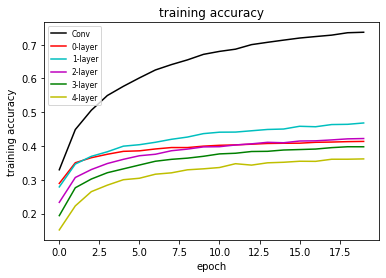

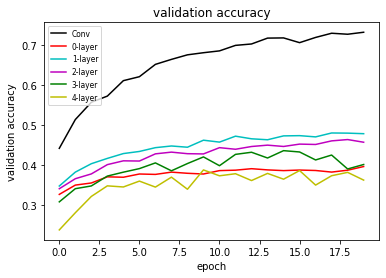

In [45]:
# Plot training accuracy
plt.plot(history.history['accuracy'],"k")
plt.plot(history_0_layer.history['accuracy'],"r")
plt.plot(history_1_layer.history['accuracy'],"c")
plt.plot(history_2_layer.history['accuracy'],"m")
plt.plot(history_3_layer.history['accuracy'],"g")
plt.plot(history_4_layer.history['accuracy'],"y")
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv','0-layer','1-layer','2-layer','3-layer','4-layer'], loc='upper left',prop={'size': 7.5})
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'],"k")
plt.plot(history_0_layer.history['val_accuracy'],"r")
plt.plot(history_1_layer.history['val_accuracy'],"c")
plt.plot(history_2_layer.history['val_accuracy'],"m")
plt.plot(history_3_layer.history['val_accuracy'],"g")
plt.plot(history_4_layer.history['val_accuracy'],"y")
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv','0-layer','1-layer','2-layer','3-layer','4-layer'], loc='upper left',prop={'size': 7.5})
plt.show()

Comparision of test accurcy for 6 models:

In [48]:
# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy for CNN:', scores[1])

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_0 = load_model('best_model_0_layer.h5')
scores = saved_model_0.evaluate(x_test, y_test, verbose=0)
print('Test accuracy for 0 layer:', scores[1])

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_1 = load_model('best_model_1_layer.h5')
scores = saved_model_1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy for 1 layer:', scores[1])

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_2 = load_model('best_model_2_layer.h5')
scores = saved_model_2.evaluate(x_test, y_test, verbose=0)
print('Test accuracy for 2 layer:', scores[1])

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_3 = load_model('best_model_3_layer.h5')
scores = saved_model_3.evaluate(x_test, y_test, verbose=0)
print('Test accuracy for 3 layer:', scores[1])

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_4 = load_model('best_model_4_layer.h5')
scores = saved_model_4.evaluate(x_test, y_test, verbose=0)
print('Test accuracy for 4 layer:', scores[1])

Test accuracy for CNN: 0.7290999889373779
Test accuracy for 0 layer: 0.4000999927520752
Test accuracy for 1 layer: 0.4779999852180481
Test accuracy for 2 layer: 0.4675999879837036
Test accuracy for 3 layer: 0.4381999969482422
Test accuracy for 4 layer: 0.3903000056743622


For both test training and validation accuracy, CNN achieves the best model with the highest test accuracy because CNN contains 4 convolutional layers, 3 dense layers. CNN achieves high accuracy by making use of adjacent pixel information and extract only useful features from input images before dense layers. Model with 1 hidden layer has the second best accuracy, and follows by 2 hidden layers, then 3 layers, 0 layer and 4 layers. I noticed an interesting pattern: as number hidden layers increases, accuracy is lower. The reason for this could be 1. number of epoch (here is 20) is not large enough to fully train models with high number of layers. 2. adding too many layers (here larger than 1) may cause gradient of weights get shrinked to 0 aka vanishing gradient, which makes it difficult for weighst to get optimized during gradient descent. 3. Other parameters do not get optimized such as batch size is not large enough during gradient descent. 4. We didn't apply batch normalization when we stacked many dense layers. If overfitting happens in the middle of dense layers, the output values in hidden layers will be distorted, this makes prediction inaccurate. CNN can prevent making bad prediction probabily because it performed convolutional layer at beginning to downsample images to prevent overfitting. Reason for 0 hidden layer is bad is because no hidden layers to learn from input images, which is impossible to approximate distribution of input data if no hidden layers provided. 

Part2:

Switching activation function from "ReLu" to "sigmoid" in CNN:

In [56]:
# Define a convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('sigmoid'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())


# create a callback that will save the best model while training
save_best_model_sigmoid = ModelCheckpoint('best_model_sigmoid.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# call function "data_aug" to train without data augmentation:
history_sigmoid=data_aug(save_best_model_sigmoid)


# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_sigmoid = load_model('best_model_sigmoid.h5')
scores = saved_model_sigmoid.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_77 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_78 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 64)      

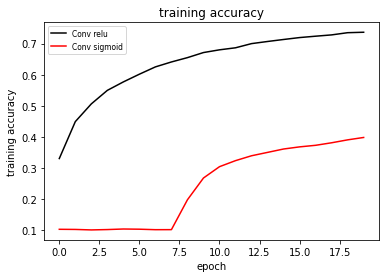

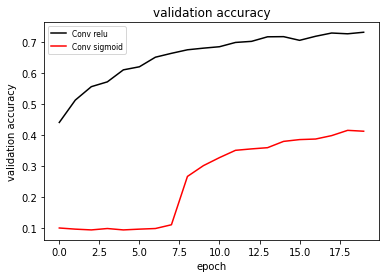

In [51]:
# Plot training accuracy
plt.plot(history.history['accuracy'],"k")
plt.plot(history_sigmoid.history['accuracy'],"r")
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv relu','Conv sigmoid'], loc='upper left',prop={'size': 7.5})
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'],"k")
plt.plot(history_sigmoid.history['val_accuracy'],"r")
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv relu','Conv sigmoid'], loc='upper left',prop={'size': 7.5})
plt.show()

In [57]:
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])
saved_model_sigmoid = load_model('best_model_sigmoid.h5')
scores_sigmoid = saved_model_sigmoid.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores_sigmoid[1])

Test accuracy: 0.7290999889373779
Test accuracy: 0.41190001368522644


I noticed sigmoid activation function is much slower than relu for weights to converge during training. The three accuracies for sigmoid is much lower than relu function. The reason could be 1. data encountered vanishing gradient when using sigmoid function. Sigmoid function's gradient is always less than 1, plus inialzied weights are less than 1, so after applying recursive function in back propagation, updated weighsts can get to 0 easily. However, relu has gradient=1 or 0, it can mitigate the problem of vanishing gradient. 

part 3:

without dropout, without data augmentation: 

In [8]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt

# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('sigmoid'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())
# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_nodropout = ModelCheckpoint('best_model_nodropout.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# call function "data_aug" to train without data augmentation:
history_nodropout=data_aug(save_best_model_nodropout)


# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_nodropout = load_model('best_model_nodropout.h5')
scores = saved_model_nodropout.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_______________________________________________

without dropout, with data augmentation:

In [9]:
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True

# Define a convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('sigmoid'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())


# create a callback that will save the best model while training
save_best_model_nodropout_withdata = ModelCheckpoint('best_model_nodropout_withdata.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# call function "data_aug" to train without data augmentation:
history_nodropout_withdata=data_aug(save_best_model_nodropout_withdata)


# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_nodropout_withdata = load_model('best_model_nodropout_withdata.h5')
scores = saved_model_nodropout_withdata.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_32 (Activation)   (None, 16, 16, 64)       


with dropout, with data augmentation:



In [10]:
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True


# Define a convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())


# create a callback that will save the best model while training
save_best_model_withdata = ModelCheckpoint('best_model_withdata.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# call function "data_aug" to train without data augmentation:
history_withdata=data_aug(save_best_model_withdata)


# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_withdata = load_model('best_model_withdata.h5')
scores = saved_model_withdata.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)       

with dropout, without data aug:

In [4]:
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False


# Define a convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())



# create a callback that will save the best model while training
save_best_model_100 = ModelCheckpoint('best_model_100.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# call function "data_aug" to train without data augmentation:
history_100=data_aug(save_best_model_100)


# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_100 = load_model('best_model_100.h5')
scores = saved_model_100.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)       

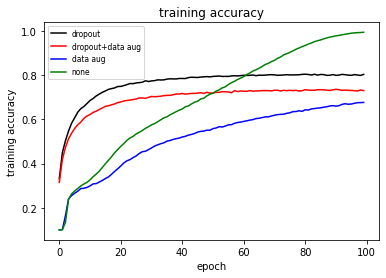

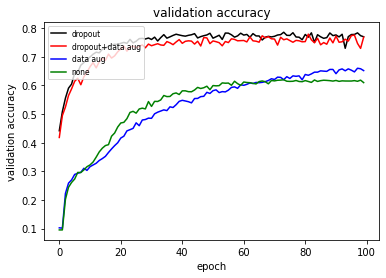

In [12]:
# Plot training accuracy
plt.plot(history_100.history['accuracy'],"k")
plt.plot(history_withdata.history['accuracy'],"r")
plt.plot(history_nodropout_withdata.history['accuracy'],"b")
plt.plot(history_nodropout.history['accuracy'],"g")

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['dropout','dropout+data aug','data aug','none'], loc='upper left',prop={'size': 7.5})
plt.show()

# Plot validation accuracy
plt.plot(history_100.history['val_accuracy'],"k")
plt.plot(history_withdata.history['val_accuracy'],"r")
plt.plot(history_nodropout_withdata.history['val_accuracy'],"b")
plt.plot(history_nodropout.history['val_accuracy'],"g")

plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['dropout','dropout+data aug','data aug','none'], loc='upper left',prop={'size': 7.5})
plt.show()

In [15]:
saved_model_100 = load_model('best_model_100.h5')
scores = saved_model_100.evaluate(x_test, y_test, verbose=0)
print('Test accuracy dropout:', scores[1])

saved_model_nodropout = load_model('best_model_nodropout.h5')
scores = saved_model_nodropout.evaluate(x_test, y_test, verbose=0)
print('Test accuracy none:', scores[1])

saved_model_nodropout_withdata = load_model('best_model_nodropout_withdata.h5')
scores = saved_model_nodropout_withdata.evaluate(x_test, y_test, verbose=0)
print('Test accuracy data aug:', scores[1])

saved_model_withdata = load_model('best_model_withdata.h5')
scores = saved_model_withdata.evaluate(x_test, y_test, verbose=0)
print('Test accuracy droupout+data aug:', scores[1])

Test accuracy dropout: 0.7724999785423279
Test accuracy none: 0.6176000237464905
Test accuracy data aug: 0.663100004196167
Test accuracy droupout+data aug: 0.7746999859809875


From test accuracy, we can see dropout+data augmentation has the best accuracy, and follows by dropout only, these two are very close to each other. Then it is model with only data augmentation and then model without anything. The result is consistent with theory since ideally dropout can avoid overfitting by constructing a different NN each time a data point pass into model, and data augmentation can also mitigate overfitting by feeding more data which rotated from input data. From validation accuracy, the results are the same except for epoch close to 100, dropout+data augmentation are the same as dropout, data augmentation doesn't work very well by improving models only a little bit. This happens maybe because we already have a large dataset which also covers various cases of data for model to train well. We can see drouput make a huge impact even we only give small dropout rate 0.25. This means our data may suffer from overfitting heavily, we can see training accuracy's highest curve is from model without anything but validation accuracy gives the lowest curve form the same model.   

part4:

adam:

In [20]:
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False


# Define a convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# Compile the model before using it
model.compile(optimizer='adam',    # categorical_crossentropy is used as loss function
              loss='categorical_crossentropy',                
              metrics=['accuracy'])
print(model.summary())



# create a callback that will save the best model while training
save_best_model_adam = ModelCheckpoint('best_model_adam.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# call function "data_aug" to train without data augmentation:
history_adam=data_aug(save_best_model_adam)


# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_adam = load_model('best_model_adam.h5')
scores = saved_model_adam.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_72 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_73 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 16, 16, 64)      

adagrad:

In [21]:
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

# Define a convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model before using it
model.compile(optimizer='adagrad',    # categorical_crossentropy is used as loss function
              loss='categorical_crossentropy',                
              metrics=['accuracy'])
print(model.summary())

# create a callback that will save the best model while training
save_best_model_adagrad = ModelCheckpoint('best_model_adagrad.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# call function "data_aug" to train without data augmentation:
history_adagrad=data_aug(save_best_model_adagrad)

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_adagrad = load_model('best_model_adagrad.h5')
scores = saved_model_adagrad.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_78 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_79 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 16, 16, 64)      

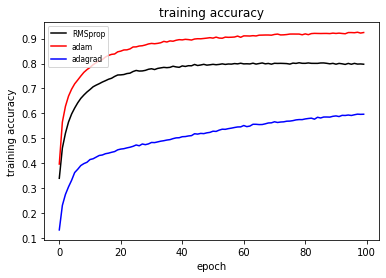

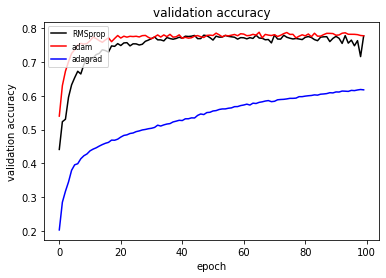

In [22]:
# Plot training accuracy
plt.plot(history_100.history['accuracy'],"k")
plt.plot(history_adam.history['accuracy'],"r")
plt.plot(history_adagrad.history['accuracy'],"b")

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop','adam','adagrad'], loc='upper left',prop={'size': 7.5})
plt.show()

# Plot validation accuracy
plt.plot(history_100.history['val_accuracy'],"k")
plt.plot(history_adam.history['val_accuracy'],"r")
plt.plot(history_adagrad.history['val_accuracy'],"b")

plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop','adam','adagrad'], loc='upper left',prop={'size': 7.5})
plt.show()

In [24]:
saved_model_100 = load_model('best_model_100.h5')
scores = saved_model_100.evaluate(x_test, y_test, verbose=0)
print('Test accuracy RMSprop:', scores[1])
# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_adam = load_model('best_model_adam.h5')
scores = saved_model_adam.evaluate(x_test, y_test, verbose=0)
print('Test accuracy adam:', scores[1])
# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_adagrad = load_model('best_model_adagrad.h5')
scores = saved_model_adagrad.evaluate(x_test, y_test, verbose=0)
print('Test accuracy adagrad:', scores[1])

Test accuracy RMSprop: 0.7786999940872192
Test accuracy adam: 0.7789999842643738
Test accuracy adagrad: 0.6172000169754028


From the validation and test accuracy, we can see adagram optimizer has the worst accuracy, RMSprop and adam are very similiar to each other in terms of test accuracy and adam is slightly better than RMSprop when epoch less than 100. The reason could be for RMSprop and adam, rt is weighted average of previous rt and square of derivative, however for adagrad, it faces the problem of $n/\sqrt{r_t}$ decays too quickly because $r_t$ keep accumulates. The reason for adam is slightly better than RMSprop is we take derivative with the respect to moving averge of gradient not gradient directly. Adam could quickly go into the direction without zigzag or take long way go into wrong direction and come back. This makes adam converge faster. 

part5:

5 by 5 filter:

In [2]:
# libraries (do not import additional libraries)
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt

# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_largefilter = ModelCheckpoint('best_model_largefilter.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# call function "data_aug" to train without data augmentation:
history_largefilter=data_aug(save_best_model_largefilter)


# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_largefilter = load_model('best_model_largefilter.h5')
scores = saved_model_largefilter.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

170500096/170498071 [==============================] - 5s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 64) 

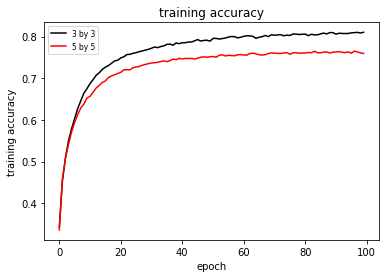

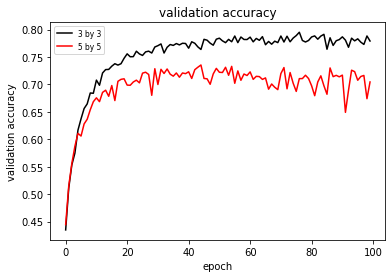

In [5]:
# Plot training accuracy
plt.plot(history_100.history['accuracy'],"k")
plt.plot(history_largefilter.history['accuracy'],"r")

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['3 by 3','5 by 5'], loc='upper left',prop={'size': 7.5})
plt.show()

# Plot validation accuracy
plt.plot(history_100.history['val_accuracy'],"k")
plt.plot(history_largefilter.history['val_accuracy'],"r")

plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['3 by 3','5 by 5'], loc='upper left',prop={'size': 7.5})
plt.show()

In [6]:
saved_model_100 = load_model('best_model_100.h5')
scores = saved_model_100.evaluate(x_test, y_test, verbose=0)
print('Test accuracy 3 by 3:', scores[1])
# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_largefilter = load_model('best_model_largefilter.h5')
scores = saved_model_largefilter.evaluate(x_test, y_test, verbose=0)
print('Test accuracy largefilter:', scores[1])

Test accuracy 3 by 3: 0.7896000146865845
Test accuracy largefilter: 0.7301999926567078


From three accuracies, model with smaller stack of large filter (5 *5) are lower than larger stack of small filter. This is consistent with theory. Good architecture is deeper layer with smaller filter instead of thin layer of a large filter because in this case we have two conv layer with 5 by 5 filter, originally we have four conv layer with 3 by 3 filters, so originally we have 4*9=36 parameters, after we change into large filer with thin layer we have 2*25=50 parameters. Therefore, compared with large filter with thin layers, small filter requires less parameters to train and go deeper. This can explain why small filter with deeper layer always gives higher accuracy. 